In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [71]:
df = pd.read_csv('Expanded_data_with_more_features.csv')
df = df.drop(df.columns[0], axis=1)
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [72]:
processed_df = df.copy()
processed_df = processed_df.dropna()
processed_df.ParentEduc = processed_df.apply(lambda row: 1 if row.ParentEduc == 'some high school' else 2 if row.ParentEduc == 'high school' else 3 if row.ParentEduc == 'some college' else 4 if row.ParentEduc == 'associate\'s degree' else 5 if row.ParentEduc == 'bachelor\'s degree' else 6, axis=1)
processed_df.LunchType = processed_df.apply(lambda row: 1 if row.LunchType == 'free/reduced' else 2, axis=1)
processed_df.TestPrep = processed_df.apply(lambda row: 1 if row.TestPrep == 'none' else 2, axis=1)
# processed_df.ParentMaritalStatus = processed_df.apply(lambda row: 1 if row.ParentMaritalStatus == 'single' else 2 if row.ParentMaritalStatus == '', axis=1)
processed_df.EthnicGroup = processed_df.apply(lambda row: 1 if row.EthnicGroup == 'group A' else 2 if row.EthnicGroup == 'group B' else 3 if row.EthnicGroup == 'group C' else 4 if row.EthnicGroup == 'group D' else 5 if row.EthnicGroup == 'group E' else 6, axis=1)

processed_df.WklyStudyHours = processed_df.apply(lambda row: 1 if row.WklyStudyHours == '< 5' else 2 if row.WklyStudyHours == '5 - 10' else 3, axis=1)

processed_df.PracticeSport = processed_df.apply(lambda row: 1 if row.PracticeSport == 'never' else 2 if row.PracticeSport == 'sometimes' else 3, axis=1)

processed_df.IsFirstChild = processed_df.apply(lambda row: 1 if row.IsFirstChild == 'no' else 2, axis=1)

processed_df = processed_df.drop(['ParentMaritalStatus', 'TransportMeans', 'Gender'], axis=1)

processed_df.NrSiblings = processed_df.loc[:, 'NrSiblings'].astype('int64')

processed_df['SumScore'] = processed_df.apply(lambda row: row.MathScore + row.ReadingScore + row.WritingScore, axis=1)

processed_df

,EthnicGroup,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,SumScore
2,2,6,2,1,2,2,4,1,87,93,91,271
4,3,3,2,1,2,2,0,2,76,78,75,229
5,2,4,2,1,3,2,1,2,73,84,79,236
6,2,3,2,2,1,1,1,2,85,93,89,267
7,2,3,1,1,2,2,1,3,41,43,39,123
...,...,...,...,...,...,...,...,...,...,...,...,...
30635,3,3,2,1,3,1,2,2,58,53,49,160
30636,4,2,2,1,2,1,2,2,59,61,65,185
30637,5,2,2,1,3,1,1,2,58,53,51,162
30639,4,4,2,2,3,1,3,2,82,90,93,265


In [73]:
X = processed_df.loc[:, "ParentEduc"].values
y = processed_df.iloc[:, -1].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])
X = X.reshape(-1, 1)

Матрица признаков
[6 3 4 3 3]
Зависимая переменная
[271 229 236 267 123]


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = regressor.predict(X_test)
print(y_pred)

[204.12546695 210.90631531 204.12546695 ... 190.56377024 217.68716366
 210.90631531]


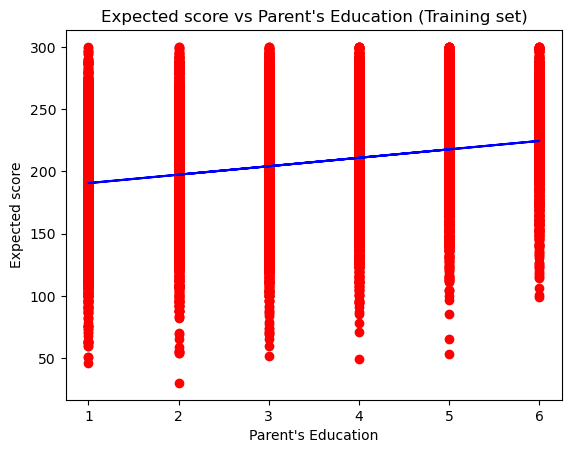

In [76]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Expected score vs Parent\'s Education (Training set)')
plt.xlabel('Parent\'s Education')
plt.ylabel('Expected score')
plt.show()

In [77]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.3f}')

Mean Absolute Error: 34.025


Матрица признаков
[6 3 4 3 3]
Зависимая переменная
[271 229 236 267 123]
[205.95066667 195.96622222 205.95066667 215.93511111 225.91955556
 205.95066667 195.96622222 195.96622222 195.96622222 195.96622222
 215.93511111 185.98177778 215.93511111 185.98177778 185.98177778
 185.98177778 175.99733333 205.95066667 175.99733333 195.96622222
 175.99733333 205.95066667 195.96622222 215.93511111 205.95066667]


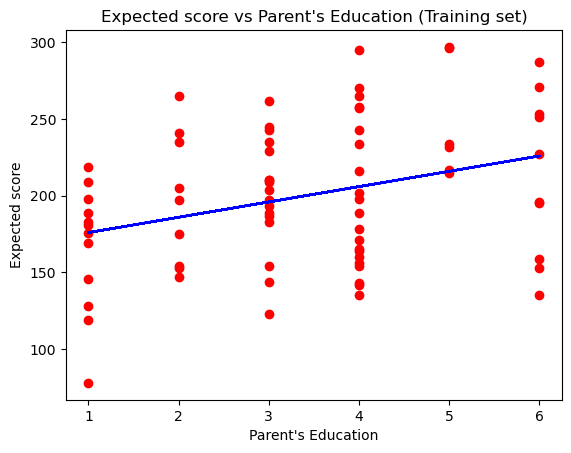

In [78]:
head_num = 100

X = processed_df.head(head_num).loc[:, "ParentEduc"].values
y = processed_df.head(head_num).iloc[:, -1].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])
X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print(y_pred)

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Expected score vs Parent\'s Education (Training set)')
plt.xlabel('Parent\'s Education')
plt.ylabel('Expected score')
plt.show()

In [79]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.3f}')

Mean Absolute Error: 39.570
